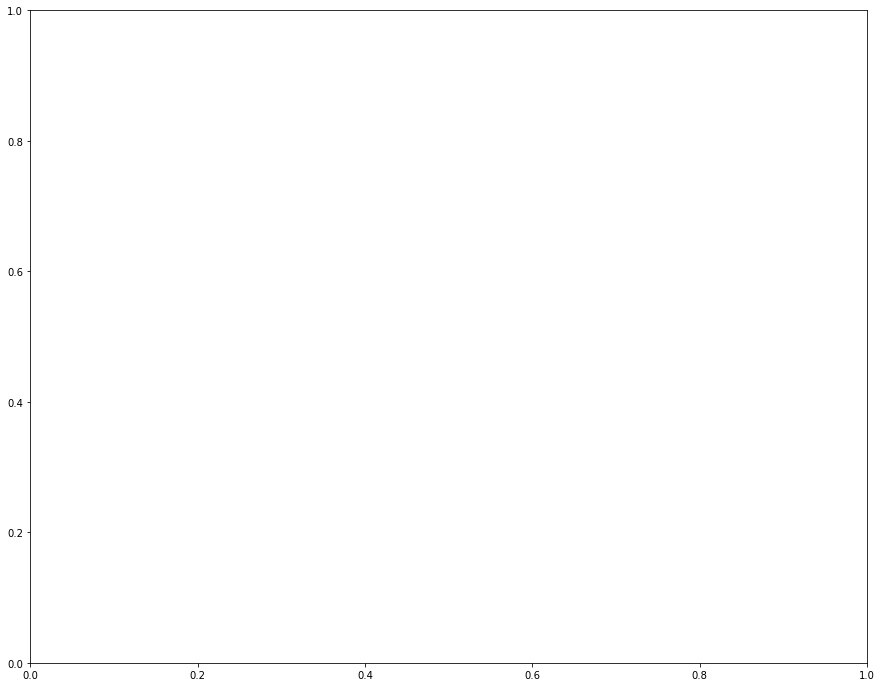

In [95]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# テストとしてコース長1800mのレースにおける馬体重とタイムの関係を調べさせていただきますよ
fig = plt.figure(figsize=(15, 12))
ax_1 = fig.add_subplot(111)
# ax_2 = fig.add_subplot(122)

df = pd.read_pickle('../DATA/race_results_of_5_years.pkl')
df_1800 = df.loc[df['コース長'] == 1800]
df_jockey = df.groupby('騎手id')
print(df_jockey)

def min_to_sec(time):
    if type(time) == str:
        sep = time.split(':')
        sec = int(sep[0]) * 60 + float(sep[1])
    else:
        sec = float(time)
    return sec

# x = []
# for horse_weight in df_1800['馬体重']:
#     elem = re.findall(r'\d+', horse_weight)
#     if elem:
#         x.append(int(elem[0]))
#     else:
#         x.append(None)

y_1 = df_cleaned['タイム'].map(min_to_sec)

# ax_1.scatter(x_2, y_1)
# plt.show()

[2024,     1998
Name: 01170, dtype: object,     26
Name: 01170, dtype: object]
[2023,     1998
Name: 01170, dtype: object,     25
Name: 01170, dtype: object]
[2022,     1998
Name: 01170, dtype: object,     24
Name: 01170, dtype: object]
[2021,     1998
Name: 01170, dtype: object,     23
Name: 01170, dtype: object]
[2020,     1998
Name: 01170, dtype: object,     22
Name: 01170, dtype: object]
[2019,     1998
Name: 01170, dtype: object,     21
Name: 01170, dtype: object]
[2018,     1998
Name: 01170, dtype: object,     20
Name: 01170, dtype: object]
[2017,     1998
Name: 01170, dtype: object,     19
Name: 01170, dtype: object]


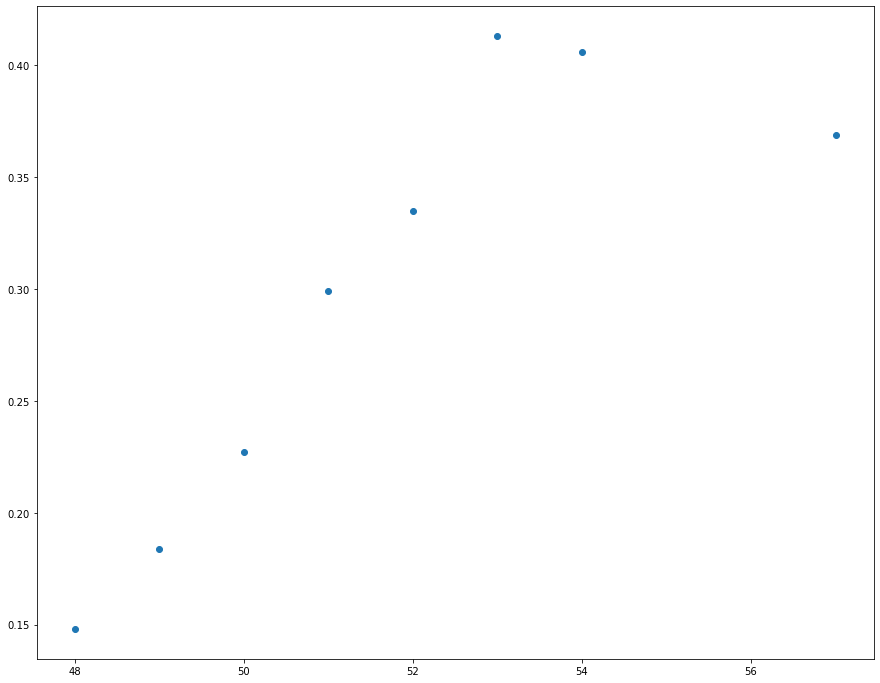

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# 騎手の年齢と勝率の関係を調査
df = pd.read_pickle('../DATA/jockey_results_of_5_years.pkl')
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)

olds = []
for jockey_id, each_df in df.groupby(df.index):
    for _, row in each_df.iterrows():
        try:
            old = int(row['年度']['年度']) - row['生年']
            olds.append(old)
#             print(int(row['年度']['年度']), row['生年'], old)
        except ValueError:
            olds.append(None)
            continue
df['年齢'] = olds
mistery = df.loc[df.index == '01170']
for _, row in mistery.iterrows():
#     print(type(row['年度']['年度']))
    if not row['年度']['年度'] == '累計':
        print([int(row['年度']['年度']), row['生年'], int(row['年度']['年度']) - row['生年']])

x = df.loc[df.index == '01170']['年齢']
y = df.loc[df.index == '01170']['複勝率']['複勝率']

ax.scatter(x, y)
plt.show()

# 複勝率は30頃がピークと仮説を立てた上で多項式回帰分析するよ。
# 人ごとに学習して、学習で得た係数の平均をとるよ。
from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# race_df = pd.read_pickle('../DATA/race_results_of_5_years.pkl')
# jockey_count = race_df.groupby('騎手id').size()
# jockey_count_over_100 = jockey_count.loc[jockey_count >= 100]
# jockey_ids = []
# for jockey_id in jockey_count_over_100.index:
#     jockey_ids.append(str(jockey_id).zfill(5))
# df_over_100 = df.loc[df.index.isin(jockey_ids)]

# for jockey_id, each_df in df_over_100.groupby(df_over_100.index):
#     print(each_df)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 馬の最近5レースの勝率と勝率の関係を調査するよ。
race_df = pd.read_pickle('../DATA/race_result_of_5_years.pkl')
horse_df = pd.read_pickle('../DATA/recent_5_race_df_for_learning.pkl')
fig = plt.figure(15, 12)
ax = fig.subplot(111)



26
